In [1]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats

# First name: Maciej (6)
# Last name: Wojtyś (6)

# Exercise 1 - generated quantities

In [2]:
stan_file = r'C:\Studia\Data-Analytics\Lab-2\code_1.stan'
gen_quant = CmdStanModel(stan_file=stan_file)

data = {
    "N": 6
}
samples = gen_quant.sample(data = data, fixed_param=True, iter_sampling=1000, iter_warmup=0)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [3]:
df = samples.draws_pd()
df

,lp__,accept_stat__,lambda,y_sim[1],y_sim[2],y_sim[3],y_sim[4],y_sim[5],y_sim[6]
0,0.0,0.0,192.43200,174.0,188.0,189.0,182.0,204.0,197.0
1,0.0,0.0,392.69000,436.0,387.0,396.0,391.0,400.0,387.0
2,0.0,0.0,230.12600,246.0,219.0,251.0,222.0,228.0,236.0
3,0.0,0.0,203.55500,212.0,200.0,204.0,200.0,200.0,205.0
4,0.0,0.0,59.82500,67.0,63.0,70.0,49.0,57.0,78.0
...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,94.10090,93.0,105.0,100.0,89.0,100.0,82.0
996,0.0,0.0,7.94367,10.0,15.0,3.0,9.0,8.0,7.0
997,0.0,0.0,271.97300,288.0,284.0,245.0,252.0,258.0,277.0
998,0.0,0.0,7.99737,10.0,9.0,4.0,5.0,12.0,6.0


In [4]:
df.iloc[:, 2:9]

,lambda,y_sim[1],y_sim[2],y_sim[3],y_sim[4],y_sim[5],y_sim[6]
0,192.43200,174.0,188.0,189.0,182.0,204.0,197.0
1,392.69000,436.0,387.0,396.0,391.0,400.0,387.0
2,230.12600,246.0,219.0,251.0,222.0,228.0,236.0
3,203.55500,212.0,200.0,204.0,200.0,200.0,205.0
4,59.82500,67.0,63.0,70.0,49.0,57.0,78.0
...,...,...,...,...,...,...,...
995,94.10090,93.0,105.0,100.0,89.0,100.0,82.0
996,7.94367,10.0,15.0,3.0,9.0,8.0,7.0
997,271.97300,288.0,284.0,245.0,252.0,258.0,277.0
998,7.99737,10.0,9.0,4.0,5.0,12.0,6.0


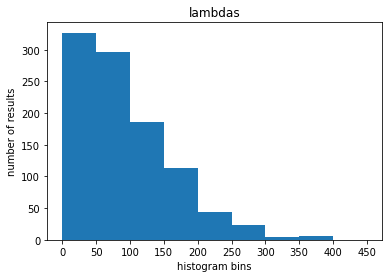

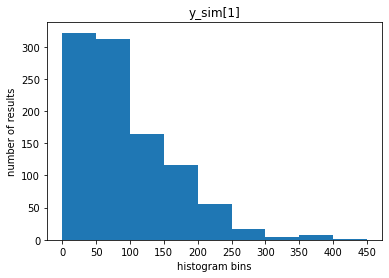

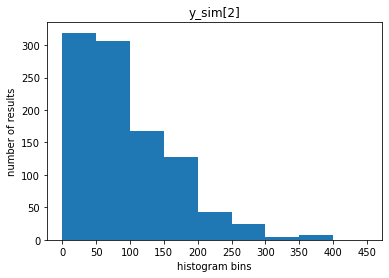

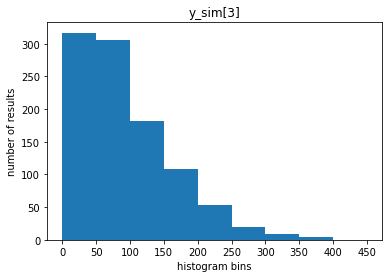

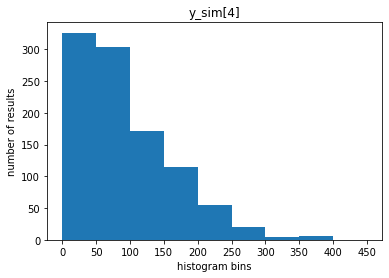

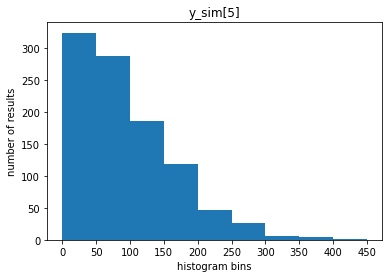

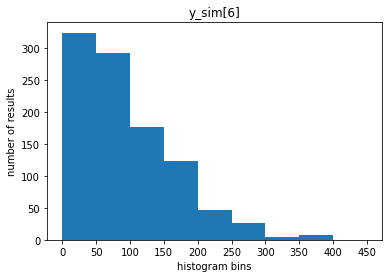

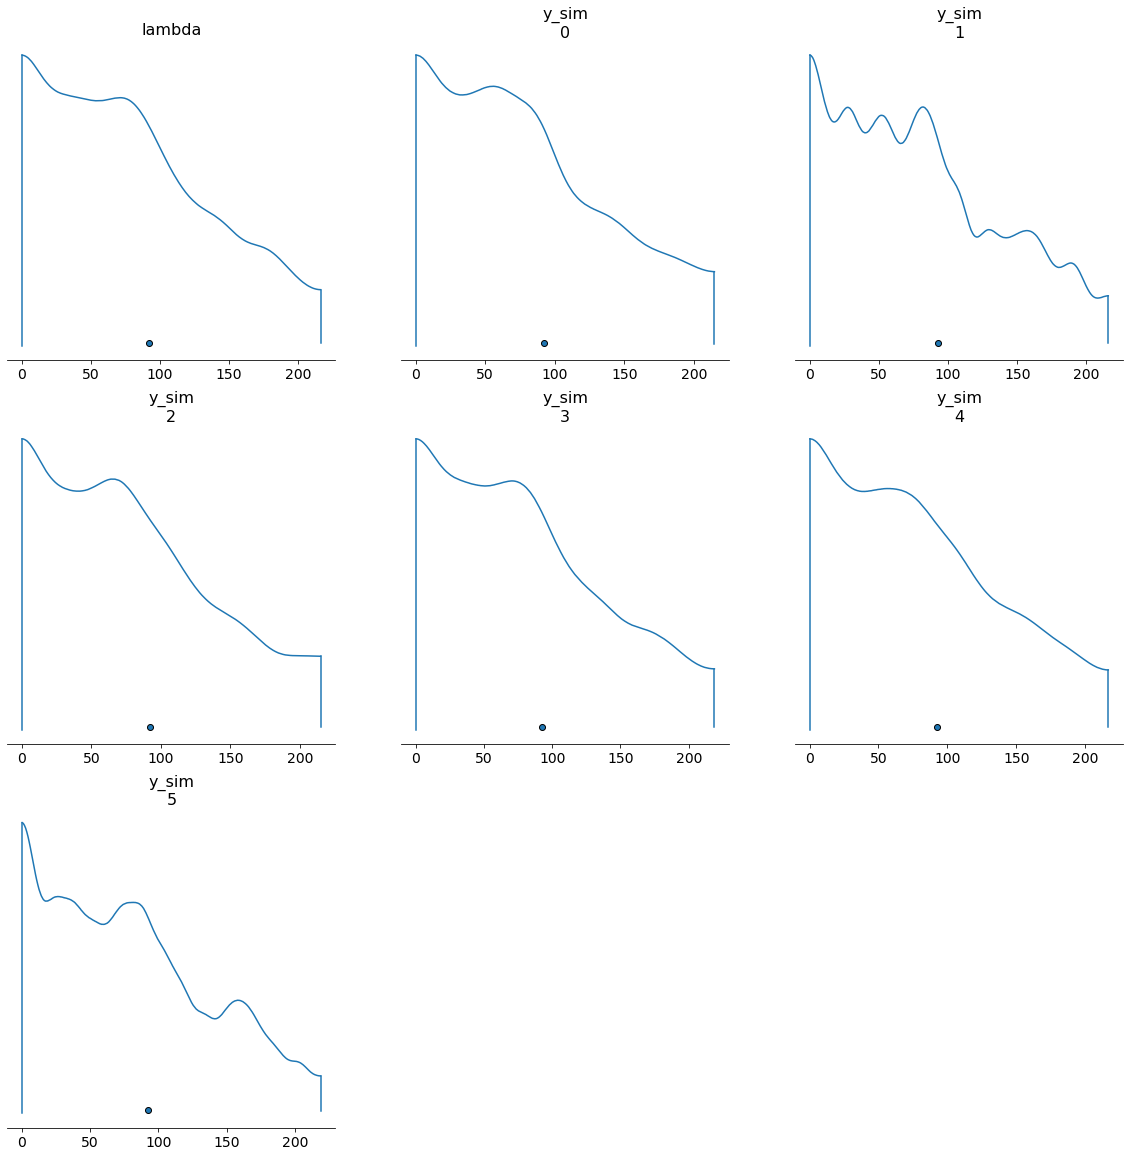

In [5]:
titles = ["lambdas", "y_sim[1]", "y_sim[2]", "y_sim[3]", "y_sim[4]", "y_sim[5]", "y_sim[6]"]
x = np.linspace(0, 450, 10)

for i in range(7):
    plt.figure(i)
    plt.hist(df.iloc[:, i + 2], bins = x)
    plt.title(titles[i])
    plt.xticks(x)
    plt.xlabel("histogram bins")
    plt.ylabel("number of results")
    plt.show()

az.plot_density(samples, figsize=(20, 20))
plt.show()


# Excercise 2 - constraints on the data

In [6]:
stan_file = r'C:\Studia\Data-Analytics\Lab-2\code_2.stan'
bern1 = CmdStanModel(stan_file=stan_file)

data = {
    "N": 12, 
    "y":[0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1]
}
samp_bern1 = bern1.sample(data = data)
df1 = samp_bern1.draws_pd()

stan_file = r'C:\Studia\Data-Analytics\Lab-2\code_3.stan'
bern2 = CmdStanModel(stan_file=stan_file)

data = {
    "N": 12, 
    "y":[0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1]
}
samp_bern2 = bern2.sample(data = data)
df2 = samp_bern2.draws_pd()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       

INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed

chain 3 |██████████| 00:00 Sampling completed


chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [7]:
df1

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,theta
0,-9.70409,0.999114,0.960219,1.0,3.0,0.0,9.76552,0.501097
1,-10.33270,0.913101,0.960219,2.0,3.0,0.0,10.42920,0.646539
2,-9.78834,0.944930,0.960219,1.0,3.0,0.0,10.76600,0.445302
3,-9.84179,0.987808,0.960219,1.0,1.0,0.0,9.85067,0.430209
4,-10.08370,0.848983,0.960219,2.0,3.0,0.0,11.01230,0.614880
...,...,...,...,...,...,...,...,...
3995,-10.20810,1.000000,1.059540,2.0,3.0,0.0,10.96550,0.368216
3996,-9.75659,0.833157,1.059540,2.0,3.0,0.0,11.22810,0.543231
3997,-9.77551,0.997988,1.059540,2.0,3.0,0.0,9.78940,0.550385
3998,-9.70423,1.000000,1.059540,1.0,3.0,0.0,9.75773,0.502496


In [8]:
df2

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,theta
0,-10.83270,0.883178,0.975500,1.0,1.0,0.0,10.87620,0.692946
1,-11.25230,0.674739,0.975500,1.0,3.0,0.0,14.24680,0.277273
2,-13.48250,0.663259,0.975500,1.0,1.0,0.0,13.49310,0.177075
3,-9.79542,0.999080,0.975500,2.0,3.0,0.0,13.30250,0.443065
4,-9.79542,0.945264,0.975500,1.0,3.0,0.0,10.14670,0.443065
...,...,...,...,...,...,...,...,...
3995,-12.31890,0.866811,0.922745,1.0,1.0,0.0,12.43550,0.779155
3996,-10.83510,1.000000,0.922745,1.0,1.0,0.0,12.06490,0.693132
3997,-9.81582,0.992539,0.922745,1.0,3.0,0.0,10.72110,0.562926
3998,-9.71876,0.988003,0.922745,1.0,3.0,0.0,9.90529,0.477099


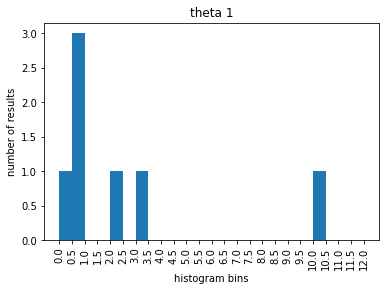

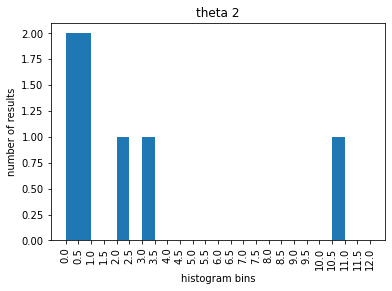

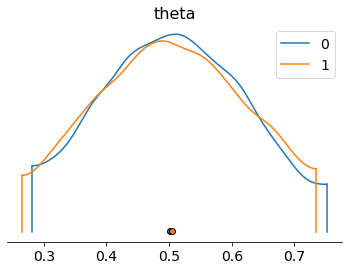

In [9]:
x = np.linspace(0, 12, 25)
plt.figure(1)
plt.hist(df1.iloc[7], bins = x)
plt.title("theta 1")
plt.xticks(x, rotation = 90)
plt.xlabel("histogram bins")
plt.ylabel("number of results")
plt.show()

plt.figure(1)
plt.hist(df2.iloc[7], bins = x)
plt.title("theta 2")
plt.xticks(x, rotation = 90)
plt.xlabel("histogram bins")
plt.ylabel("number of results")
plt.show()

az.plot_density([samp_bern1, samp_bern2])
plt.show()

# Excercise 3 - constraints on the parameters

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██▊       | 00:00 Iteration: 1700 / 7000 [ 24%]  (Sampling)


chain 1 |█████▊    | 00:00 Iteration: 3900 / 7000 [ 55%]  (Sampling)


chain 1 |█████████▎| 00:00 Iteration: 6400 / 7000 [ 91%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


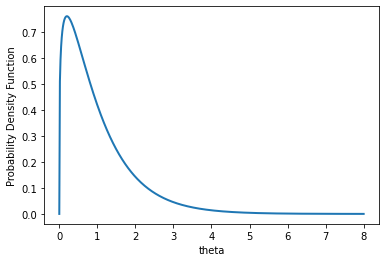

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed

chain 3 |██████████| 00:00 Sampling completed


chain 4 |██████████| 00:00 Sampling completed

INFO:cmdstanpy:CmdStan done processing.


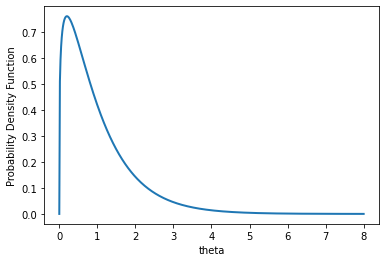

In [10]:
stan_file = r'C:\Studia\Data-Analytics\Lab-2\code_4.stan'
model_gm1 = CmdStanModel(stan_file=stan_file)

data = {
    "N": 12, 
}
out_gamma1 = model_gm1.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma1.diagnose()
# -------------------------------------------------------------------
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples with 160 bins

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()
# -------------------------------------------------------------------
df1 = out_gamma1.draws_pd()

stan_file = r'C:\Studia\Data-Analytics\Lab-2\code_5.stan'
model_gm2 = CmdStanModel(stan_file=stan_file)

data = {
    "N": 12, 
}
out_gamma2 = model_gm2.sample(data = data)
out_gamma2.diagnose()
# -------------------------------------------------------------------
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples with 160 bins

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()
# -------------------------------------------------------------------
df2 = out_gamma2.draws_pd()

In [11]:
df1

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,theta
0,-1.039880,0.999946,0.403945,1.0,1.0,0.0,1.043850,0.782971
1,-0.779607,1.000000,0.403945,2.0,7.0,0.0,1.036580,0.474650
2,-0.745673,0.500000,0.403945,1.0,2.0,1.0,1.538240,0.072955
3,-0.884356,0.395482,0.403945,3.0,7.0,0.0,0.971978,0.607953
4,-1.250810,0.664096,0.403945,1.0,3.0,1.0,2.200670,1.000810
...,...,...,...,...,...,...,...,...
23995,-0.654818,0.997837,0.368252,2.0,7.0,0.0,0.672250,0.173249
23996,-0.711693,0.977990,0.368252,1.0,1.0,0.0,0.712111,0.091863
23997,-0.711693,0.000000,0.368252,0.0,1.0,1.0,0.997086,0.091863
23998,-0.711693,0.000000,0.368252,0.0,1.0,1.0,0.968332,0.091863


In [12]:
df2

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,theta
0,-1.42688,1.000000,0.908140,2.0,3.0,0.0,1.69875,1.630220
1,-1.42688,0.049571,0.908140,1.0,1.0,0.0,2.31840,1.630220
2,-1.25013,1.000000,0.908140,1.0,1.0,0.0,1.33536,1.014690
3,-1.35697,0.831441,0.908140,2.0,3.0,0.0,1.63236,0.641274
4,-1.35697,0.169482,0.908140,1.0,1.0,0.0,2.30243,0.641274
...,...,...,...,...,...,...,...,...
3995,-1.42599,0.938228,0.620146,3.0,7.0,0.0,5.07572,0.558765
3996,-1.43124,0.999011,0.620146,3.0,7.0,0.0,1.43688,1.639200
3997,-1.55839,0.989959,0.620146,3.0,7.0,0.0,1.57457,1.875680
3998,-2.51481,0.722935,0.620146,1.0,1.0,0.0,2.52899,3.163540


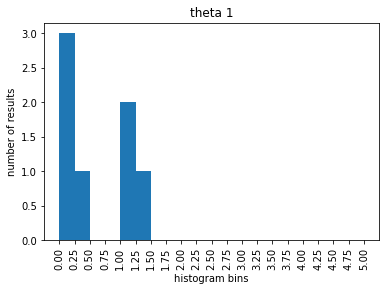

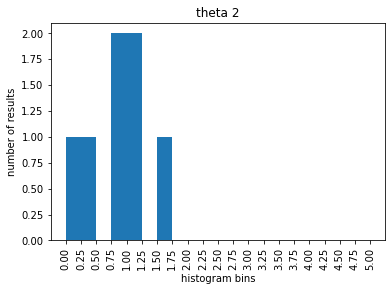

array([[<AxesSubplot:title={'center':'theta'}>]], dtype=object)

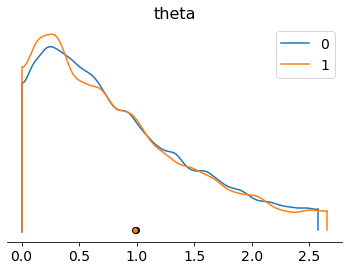

In [13]:
x = np.linspace(0, 5, 21)
plt.figure(1)
plt.hist(df1.iloc[7], bins = x)
plt.title("theta 1")
plt.xticks(x, rotation = 90)
plt.xlabel("histogram bins")
plt.ylabel("number of results")
plt.show()

plt.figure(2)
plt.hist(df2.iloc[7], bins = x)
plt.title("theta 2")
plt.xticks(x, rotation = 90)
plt.xlabel("histogram bins")
plt.ylabel("number of results")
plt.show()

az.plot_density([out_gamma1, out_gamma2])


# Excercise 4 - functions and different functionalities of stan

In [14]:
stan_file = r'C:\Studia\Data-Analytics\Lab-2\code_6.stan'
model_tune = CmdStanModel(stan_file=stan_file)

data = {
    "y_guess": [2],
    "theta": [6]
}

tunes = model_tune.sample(data = data, fixed_param=True, iter_sampling=1, iter_warmup=0, chains = 1)
tunes.draws_pd()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,sigma
0,0.0,0.0,2.32935


# Excercise 5 - different methods of defining models

In [15]:
data = {
    "N": 6
}

seed = 18011999

stan_file = r'C:\Studia\Data-Analytics\Lab-2\code_7.stan'
model_samp_st = CmdStanModel(stan_file=stan_file)

result_1 = model_samp_st.sample(data = data, seed = seed)

stan_file = r'C:\Studia\Data-Analytics\Lab-2\code_8.stan'
model_log_target = CmdStanModel(stan_file=stan_file)

result_2 = model_log_target.sample(data = data, seed = seed)

stan_file = r'C:\Studia\Data-Analytics\Lab-2\code_9.stan'
model_log_target_ind = CmdStanModel(stan_file=stan_file)

result_3 = model_log_target_ind.sample(data = data, seed = seed)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)



chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed                       


chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |███████▎  | 00:00 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [17]:
result_1.draws_pd()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,y[1],y[2],y[3],y[4],y[5],y[6],theta
0,-3.55453,0.928655,0.381849,3.0,7.0,0.0,4.72647,0.133703,-1.352480,1.145290,-1.407990,-0.281900,-0.785424,0.196441
1,-1.75436,0.993504,0.381849,3.0,7.0,0.0,6.05109,-1.669650,0.138884,0.806584,-0.496002,-0.219932,-0.548495,-0.338638
2,-1.60821,0.928427,0.381849,3.0,7.0,0.0,4.64233,-1.461600,0.501942,0.251429,0.489843,-0.683529,-0.205866,-0.323336
3,-2.53318,0.878681,0.381849,3.0,15.0,0.0,5.16203,-0.064824,-0.928533,0.869236,1.359660,-0.240903,-0.365619,0.546640
4,-4.46743,0.975732,0.381849,3.0,7.0,0.0,6.58369,2.972560,-0.220087,1.648750,0.595188,0.791165,0.132680,0.408033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-6.10169,0.807506,0.361206,3.0,7.0,0.0,9.47015,2.437200,-0.206466,0.967366,1.373240,-0.228300,2.055240,1.756770
3996,-4.97966,0.963978,0.361206,3.0,7.0,0.0,9.91890,-0.229008,2.565610,0.123681,0.134409,1.288890,-1.243860,0.769560
3997,-3.98953,0.799156,0.361206,3.0,7.0,0.0,8.65997,1.095130,-1.487290,0.749459,0.497172,-0.395151,2.128500,0.433931
3998,-1.25404,0.648784,0.361206,2.0,3.0,0.0,7.67444,0.725180,0.359647,0.195996,1.363590,-0.422767,0.804130,0.182223


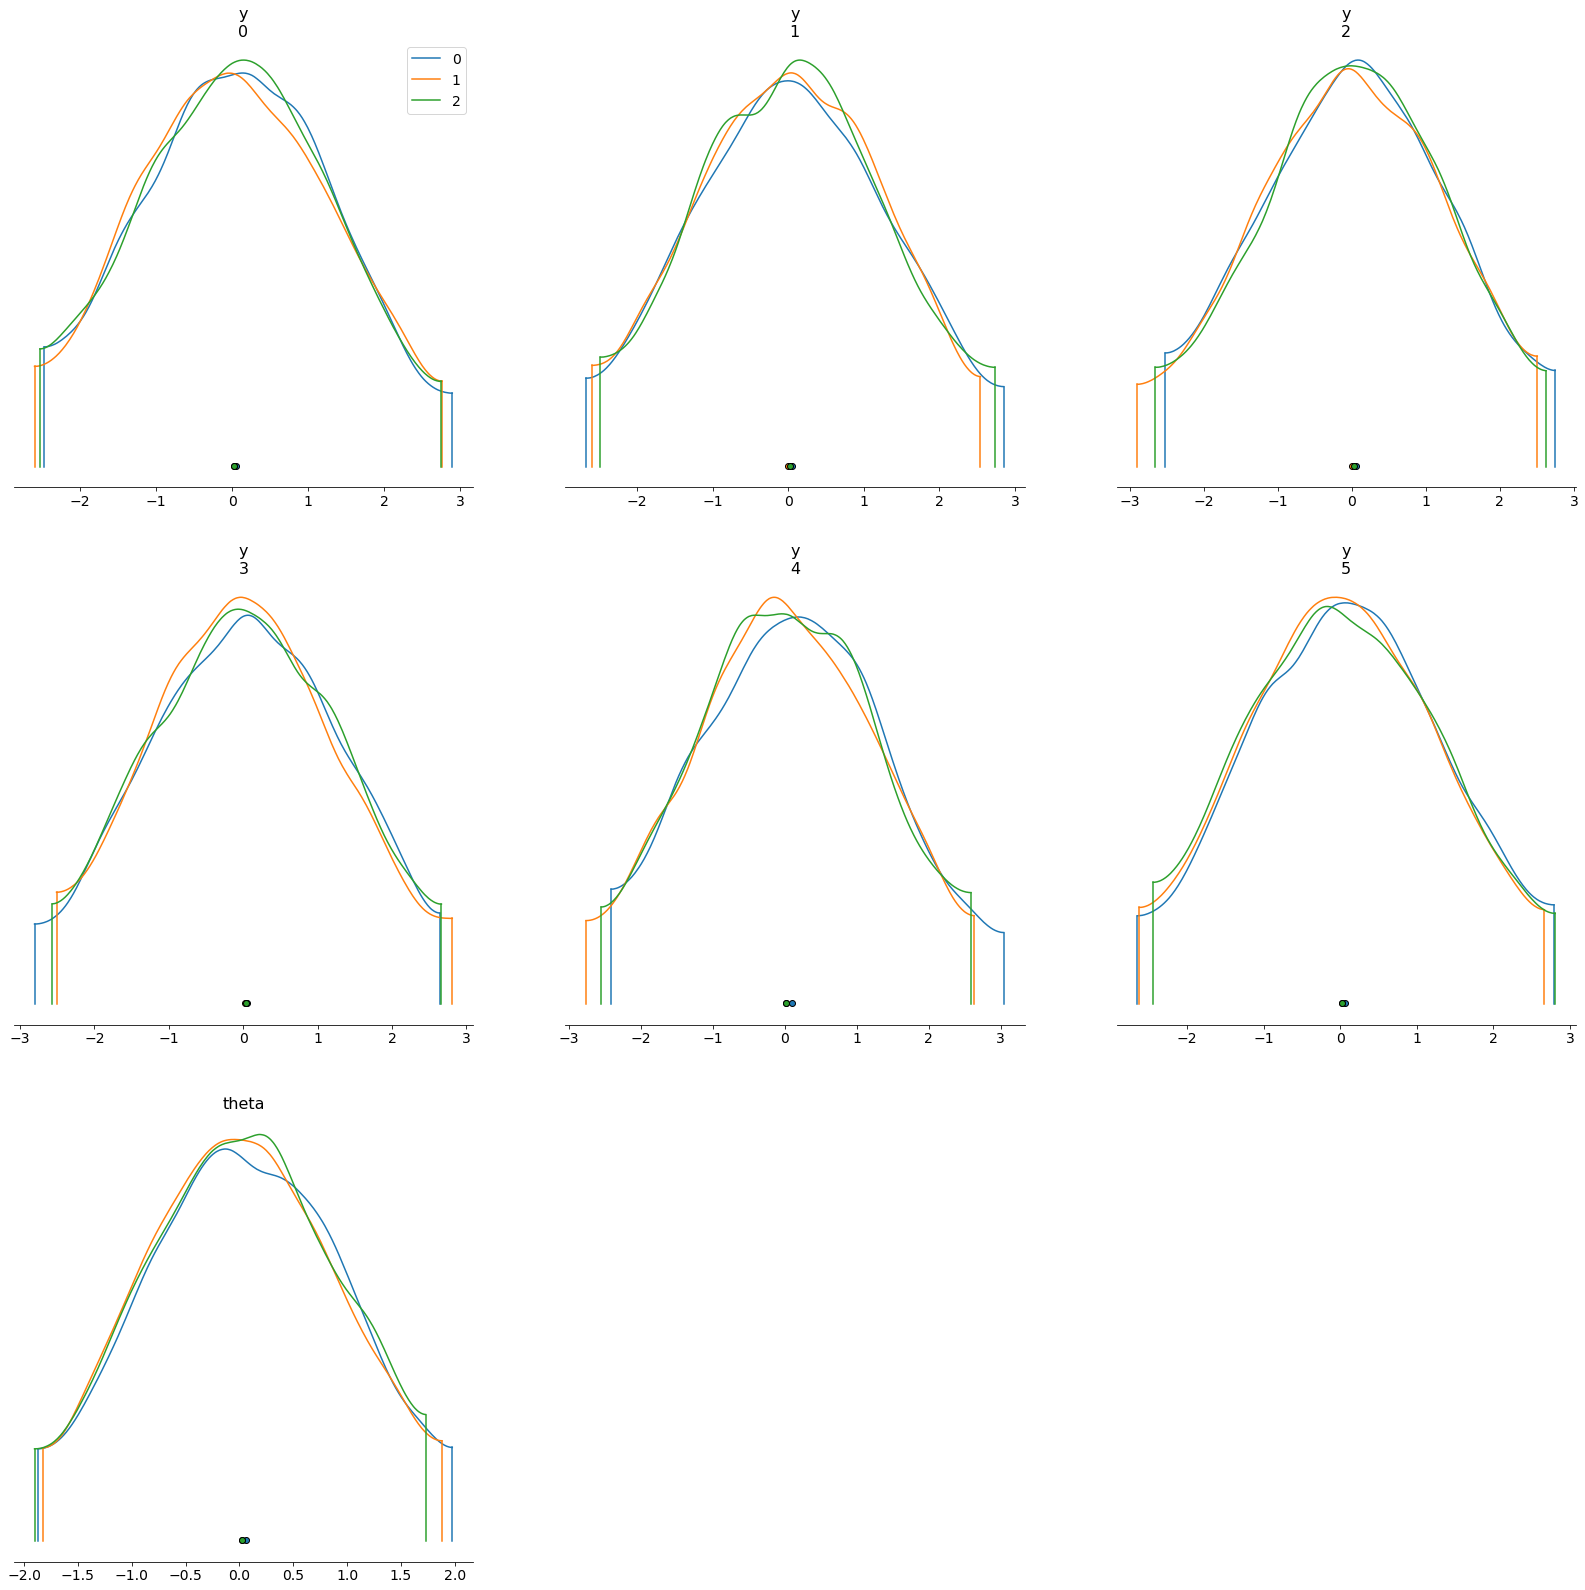

In [18]:
az.plot_density([result_1,result_2,result_3], figsize = (28, 28))
plt.show()

# Excercise 6 - generated quantities post sampling

In [19]:
stan_file = r'C:\Studia\Data-Analytics\Lab-2\code_10.stan'
model_gq = CmdStanModel(stan_file=stan_file)
data = {
    "N": 6
}
mean_of_y = model_gq.generate_quantities(data = data, mcmc_sample = result_3)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [4] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [3] done processing
INFO:cmdstanpy:Chain [2] done processing


In [20]:
df = mean_of_y.draws_pd()
df

,mean_y
0,0.509989
1,0.916376
2,1.986280
3,0.651442
4,1.351450
...,...
3995,-0.429500
3996,-0.339768
3997,-0.325016
3998,-0.662676


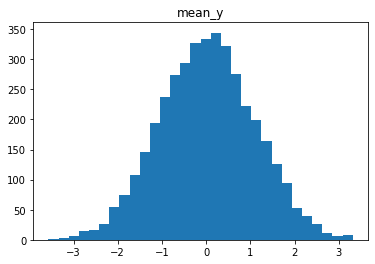

In [21]:
plt.hist(df.iloc[:, 0], bins = 30)
plt.title("mean_y")
plt.show()